[[ 0.28370521  0.0319854 ]
 [ 0.41622385 -0.23741467]
 [-0.39569689 -0.74902202]
 [ 0.75235654  0.0308987 ]
 [ 0.24529106  0.69303119]
 [-0.04278186  1.66455455]
 [ 0.28681667  0.01332483]
 [-1.93371488  0.20359829]
 [-0.81998575 -0.90321907]
 [-0.20979046 -0.14740707]]
(100, 10)
[ 0.45462441  0.65812514  0.60608869 -1.74589203  0.62777097 -0.35236556
 -1.59977702  0.26358474  1.05108729  0.67154058  2.2039193  -0.98173223
  2.52214899  0.07791121  1.39602102 -0.34681501  0.29545804  1.22337651
  0.12255612  0.54837071]
         Current function value: -10722.390253
         Iterations: 29
         Function evaluations: 165
         Gradient evaluations: 153


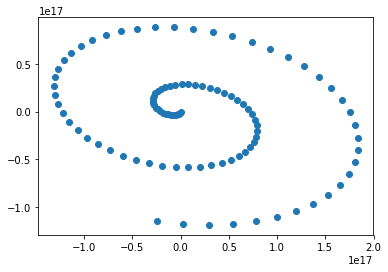

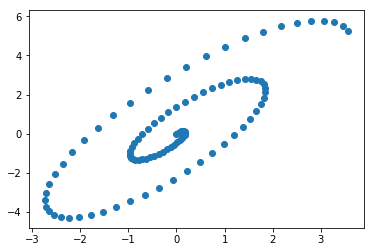

In [11]:
import numpy as np
import scipy as sp
import scipy.optimize as opt

import matplotlib.pyplot as plt


def f(W):
    W = np.reshape(W,(10,2))
    H = np.dot(W,np.transpose(W))
    I = 2*np.eye(10)
    inv = np.linalg.inv(H+I)
    A = 50*np.log(np.linalg.det(H+I))
    B = 0.5*np.trace(np.dot(inv, np.dot(np.transpose(Y),Y)))
    val = A+B+0.5*10*100*np.log(2*np.pi)
    return -val

def dfx(W):
    W = np.reshape(W,(10,2))
    H = np.dot(W,np.transpose(W))
    I = sigma*np.eye(10)
    inv = np.linalg.inv((H+I))

    val = np.empty(W.shape)
    for i in range(val.shape[0]):
        for j in range(val.shape[1]):
            J = np.zeros(np.shape(W))
            J[i,j] = 1
            dWW = np.dot(J,np.transpose(W)) + np.dot(W,np.transpose(J))
            A = 100*np.trace(np.dot(inv,dWW))
            B1 = np.dot(np.dot(-inv, dWW),inv)
            B = 100*np.trace(np.dot(B1, np.dot(np.transpose(Y),Y)))
            val[i,j]= -0.5*A+-0.5*B
    val = np.reshape(val,(20,))
    return val

def fnonlin(x):
    Y = np.zeros((100,2))
    Y[:,0]= np.multiply(x,np.cos(x))
    Y[:,1]= np.multiply(x,np.sin(x))
    return Y

def flin(x, A):
    return np.dot(x, np.transpose(A))

A = np.random.randn(20)
A = A.reshape((10,2))
print(A)
x = np.linspace(0,4*np.pi,100)

Y = flin(fnonlin(x), A)
print(Y.shape)

noise = np.random.multivariate_normal(np.zeros(10), 0.1*np.eye(10), 100)

sigma = 2

A = np.random.randn(20)
A = np.reshape(A, (20,))
print(A)
W0 = np.ones(20)
Wstar = opt.fmin_cg(f,A, fprime=dfx)
W = np.reshape(Wstar,(10,2))
WtW = np.dot(np.transpose(W),W)
inv = np.linalg.pinv(WtW)
newX = np.dot(Y, np.dot(W,WtW))
plt.figure(1)
plt.scatter(newX[:,0],newX[:,1])
plt.figure(2)
plt.scatter(Y[:,0],Y[:,1])
plt.show()

         Current function value: 2067.881251
         Iterations: 13
         Function evaluations: 46
         Gradient evaluations: 34


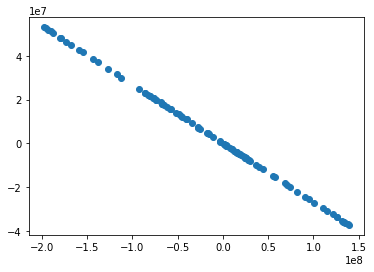

In [13]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

def generateA():
     A = np.random.randn(20)
     A = A.reshape((10,2))
     return A

def generateX():
    x = np.linspace(0,4*np.pi,100)
    X = np.zeros((100,2))
    X[:,0]= np.multiply(x,np.cos(x))
    X[:,1]= np.multiply(x,np.sin(x))
    return(X)

def generateY():
    A = generateA()
    X = generateX()
    Y = np.dot(X, np.transpose(A))
    noise = np.random.multivariate_normal(np.zeros(10), 0.1*np.eye(10), 100)
    return Y+noise

sigma = 2
Y = generateY()

def f(W):
    W = np.reshape(W,(10,2))
    H = np.dot(W,np.transpose(W))
    I = sigma*np.eye(10)
    inv = np.linalg.inv(H+I)
    A = 50*np.log(np.linalg.det(H+I))
    B = 0.5*np.trace(np.dot(inv, np.dot(np.transpose(Y),Y)))
    return A+B+0.5*10*100*np.log(2*np.pi)

def df(W):
    W = np.reshape(W,(10,2))
    H = np.dot(W,np.transpose(W))
    I = sigma*np.eye(10)
    inv = np.linalg.inv((H+I))

    val = np.empty(W.shape)
    for i in range(val.shape[0]):
        for j in range(val.shape[1]):
            J = np.zeros(np.shape(W))
            J[i,j] = 1
            dWW = np.dot(J,np.transpose(W)) + np.dot(W,np.transpose(J))
            A = 100*np.trace(np.dot(inv,dWW))
            B1 = np.dot(np.dot(-inv, dWW),inv)
            B = np.trace(np.dot(B1, np.dot(np.transpose(Y),Y)))
            val[i,j]= 0.5*A+0.5*B
    val = np.reshape(val,(20,))
    return val

A = 20*np.random.randn(20)
A = np.reshape(A, (20,))
W0 = np.ones(20)
Wstar = opt.fmin_cg(f,A, fprime=df)
W = np.reshape(Wstar,(10,2))
WtW = np.dot(np.transpose(W),W)
inv = np.linalg.pinv(WtW)
X = np.dot(Y, np.dot(W,WtW))
plt.scatter(X[:,0],X[:,1])
plt.show()